##### Task 1 : Obtain the overall structure of the dataset.
Out of the 14 different columns in our dataframe all of the variables are of type float with the exception of the RAD column.
506 entries are available in total with some entries missing values in some columns.Some columns have a much greater standrad deviation than others. With also much different means indicating that the data should later be normalized for a better analysis.


In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

df = pd.read_excel('DataSet.xlsx')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   

Check Dataframe for null values and find the number of null values in each column

##### Task 2 : Chech dataset for missing values and find the ratio of missing values in each column :
4 columns have missing values the columns being 'CHAS', 'DIS', 'B', 'MEDV'. The highest ratio of missing values is for the column 'MEDV' which is also our target variable which we want to predict.

In [2]:
null_counts = df.isnull().sum()
null_count_ratio = []
for col, null_count in null_counts.items():
    if null_count != 0:
        ratio = null_count / len(df[col])
        null_count_ratio.append((col, ratio))

print("Missing value ratio for columns with missing values:")
for col, ratio in null_count_ratio:
    print(f"Column '{col}': {ratio:.2%}")

Missing value ratio for columns with missing values:
Column 'CHAS': 5.14%
Column 'DIS': 5.34%
Column 'B': 3.95%
Column 'MEDV': 10.67%


##### Task 3 : Plot the number of unique values in each colum
Doing this will help us distinguish categorical values from numerical values which is important and will be helpful later on.

Based on the barplot drawn below we can assume that columns 'CHAS', 'RAD' are most likely categorical. 

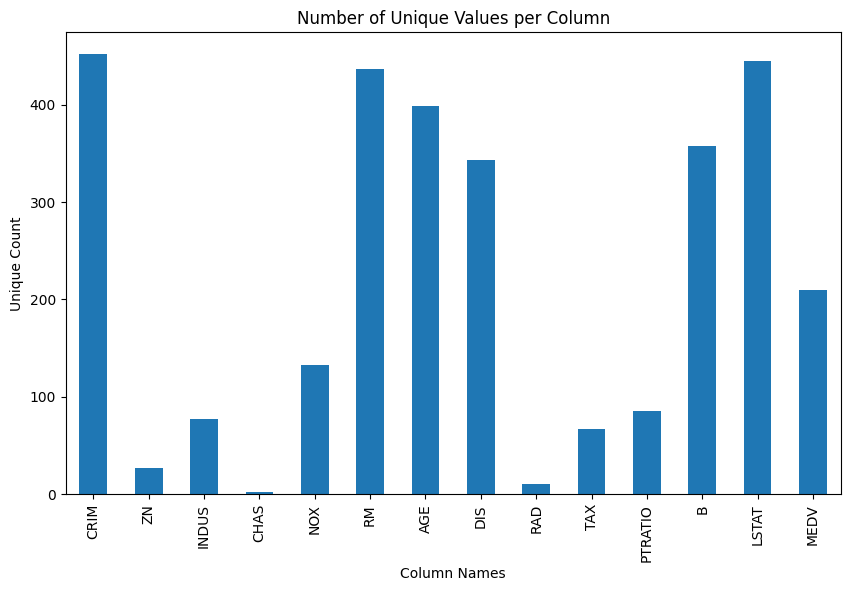

In [3]:
unique_counts = df.nunique()
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar')
plt.title('Number of Unique Values per Column')
plt.ylabel('Unique Count')
plt.xlabel('Column Names')
plt.show()

##### Task 4 : Plot the correlation diagram for the columns.
We will do this by displaying the heatmap obtained from the correlation matrix.

Correlation Matrix :

The correlation matrix is calculated by computing the correlation coefficient for each pair of variables and inserting it into the relevant cell of the matrix.
The resulting correlation coefficient varies from -1 to +1, with -1 being a perfect negative correlation, +1 representing a perfect positive correlation, and 0 representing no correlation between the variables. This information can be used to determine which variables are significantly connected with one another and which are poorly correlated or not correlated at all1

<Axes: >

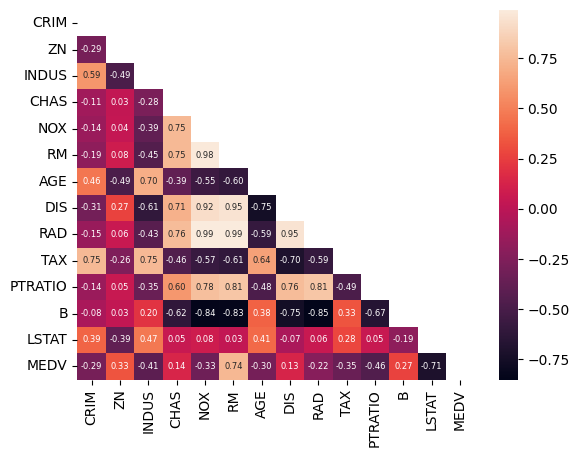

In [4]:
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True,
            fmt=".2f", annot_kws={'size': 6})

##### Task 5 : Use scatter plots and hexbin plots to observe the relationship of features with the target.
-A scatter plot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose x-y coordinates relate to its values for the two variables.
Scatter plots can reveal the direction, strength, and linearity of the relationship between two variables.

-Hexbin plots, also known as hexagonal binning plots, are a type of two-dimensional histogram that uses hexagonal cells to visualize the density of data points. Unlike standard histograms which use rectangular bins, hexagonal binning offers advantages like reducing sampling bias and visualizing spatial patterns in data.
Hexbin plots are especially useful when dealing with large amounts of data, as they help in avoiding overplotting and revealing patterns in dense datasets.


/tmp/ipykernel_73682/205484817.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df[column], df['MEDV'], cmap='Blues')


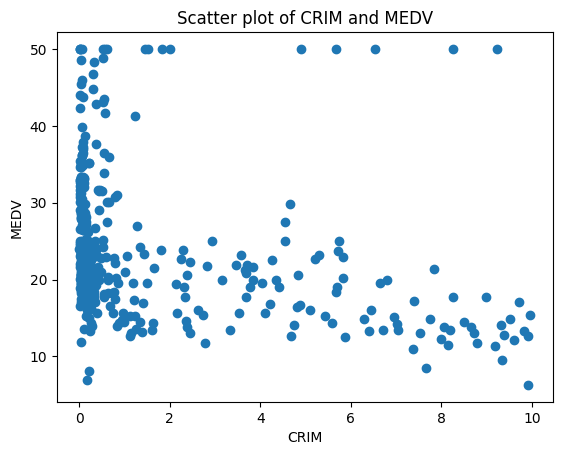

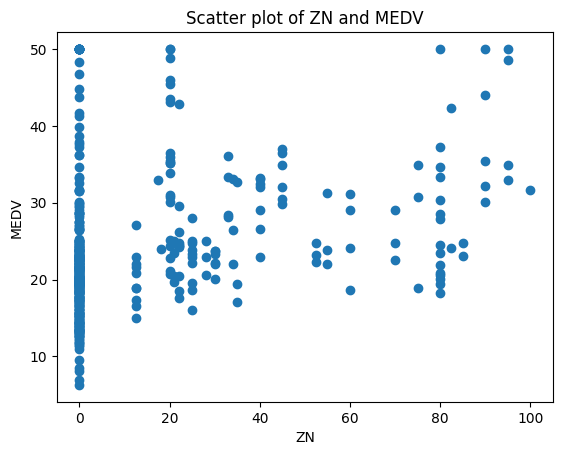

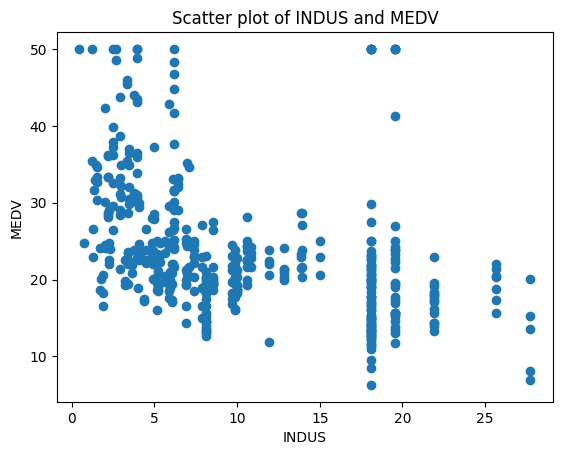

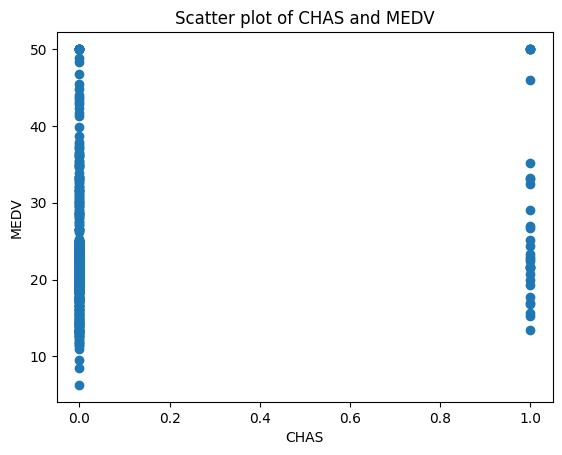

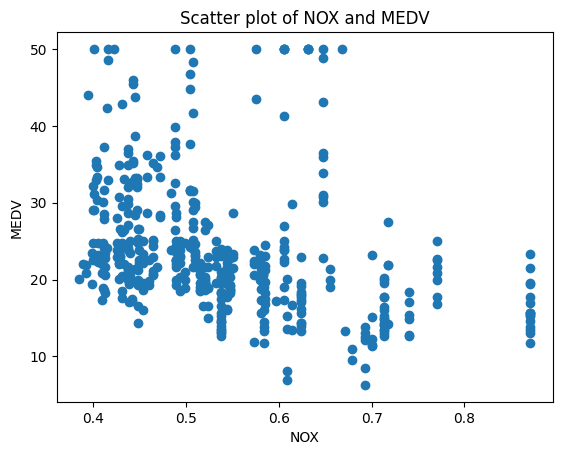

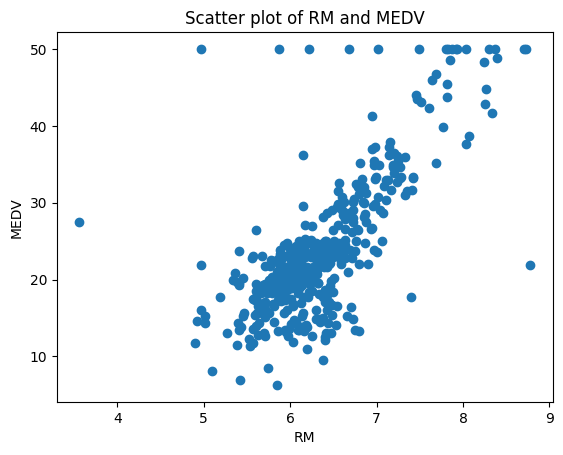

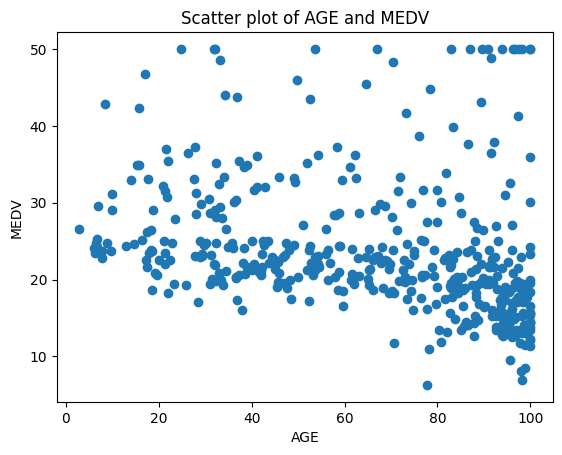

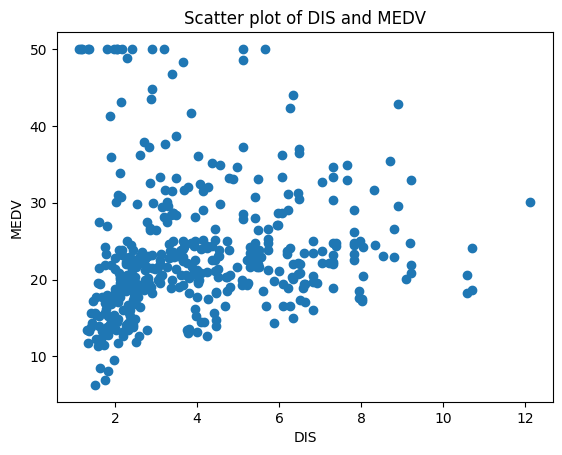

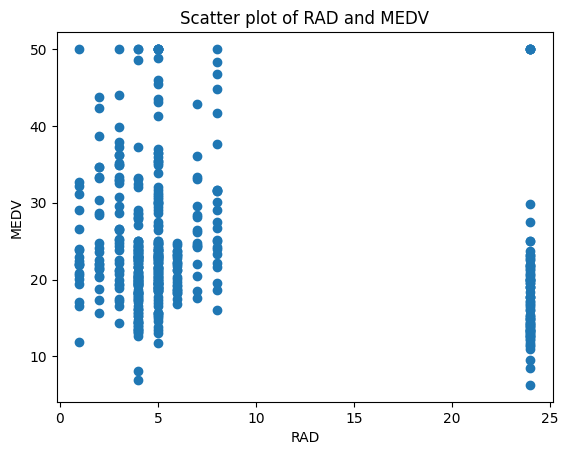

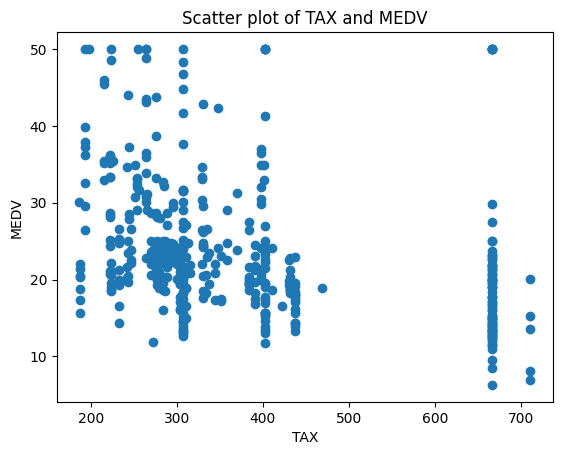

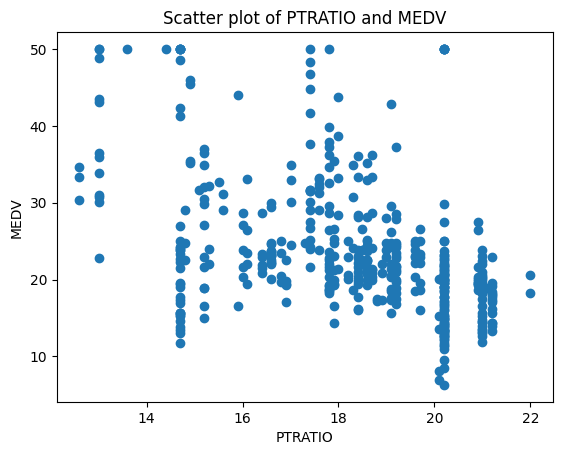

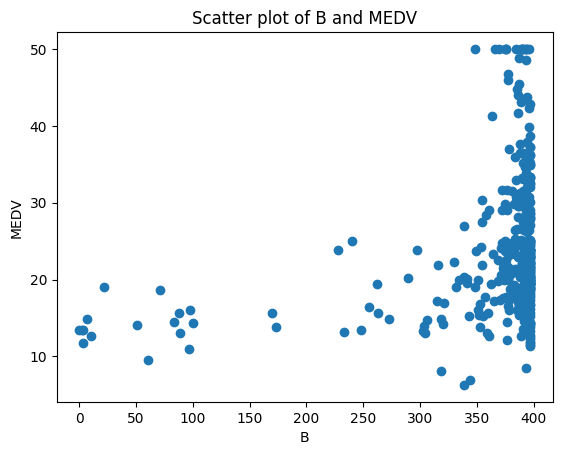

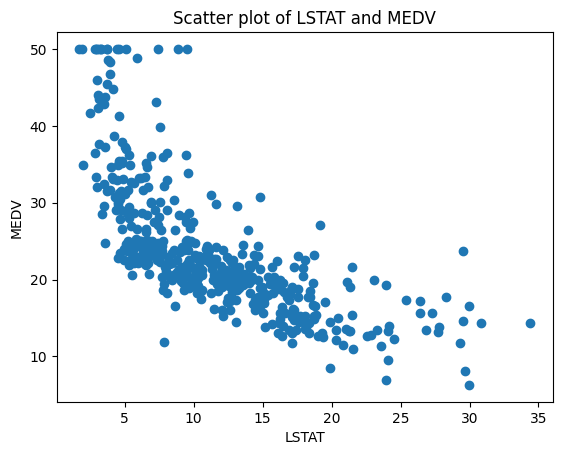

In [5]:
for column in df.columns:
    if column == 'MEDV':
        continue

    plt.scatter(df[column], df['MEDV'], cmap='Blues')

    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.title(f'Scatter plot of {column} and MEDV')
    plt.show()

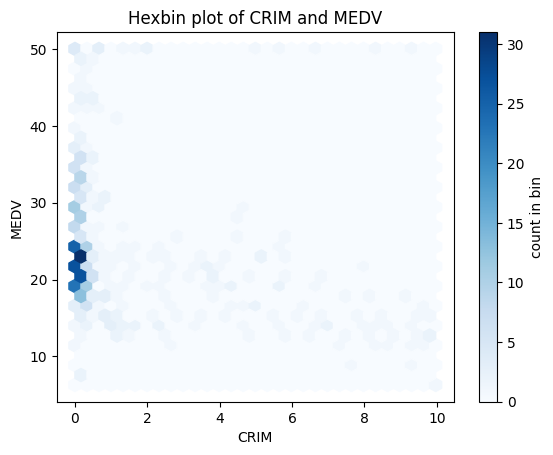

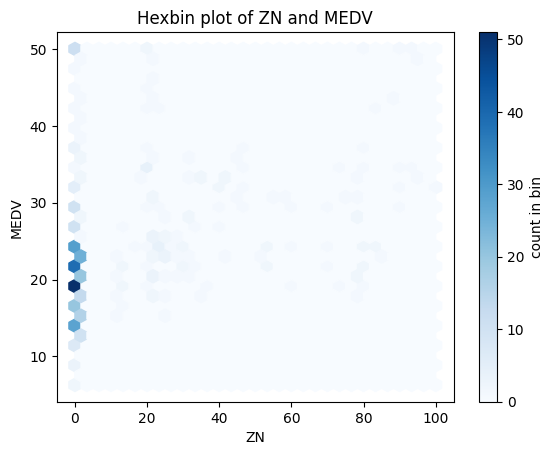

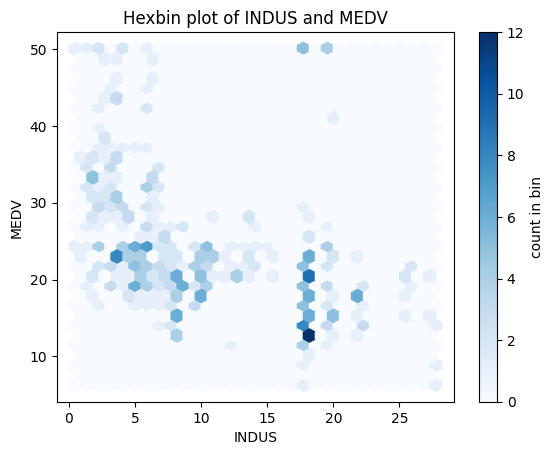

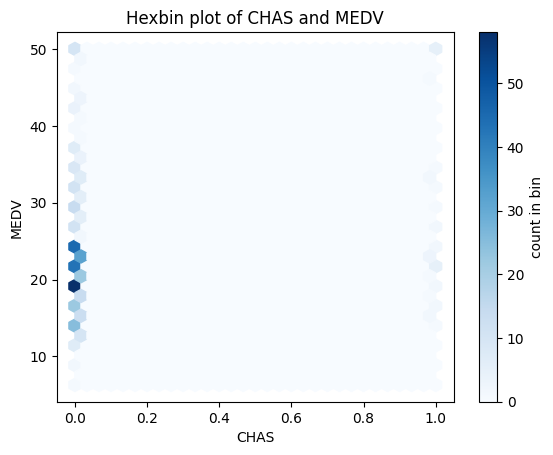

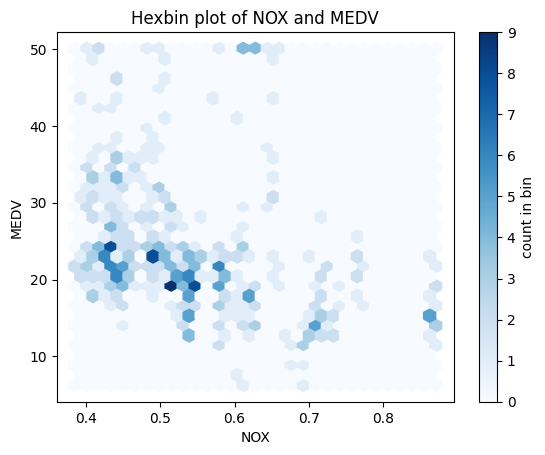

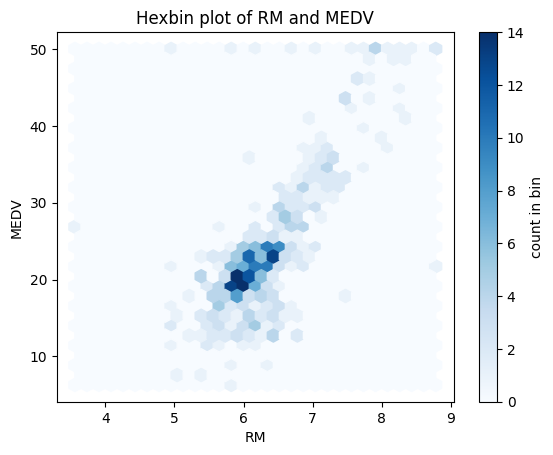

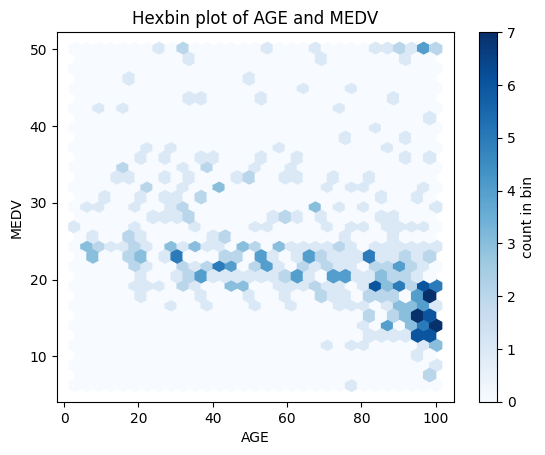

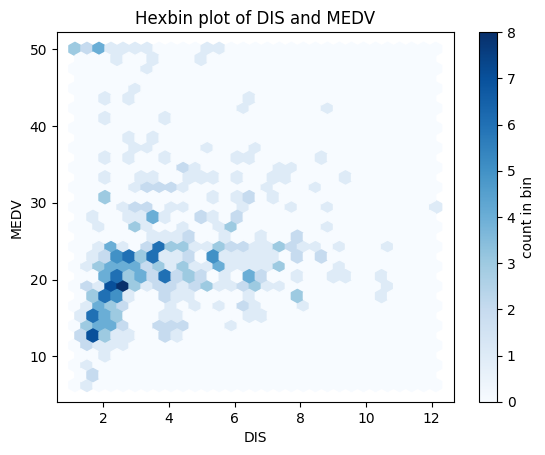

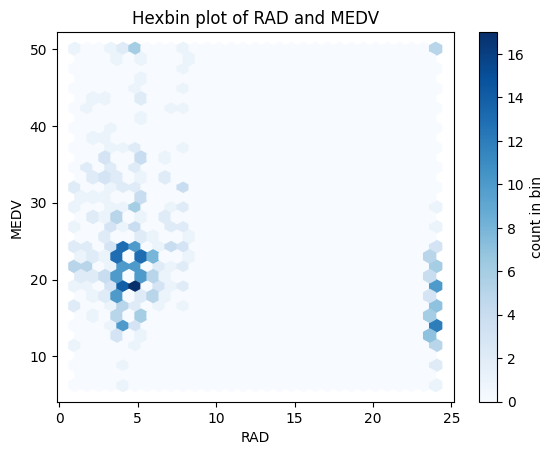

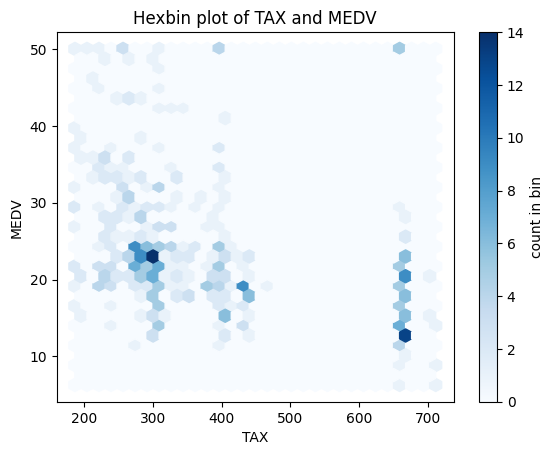

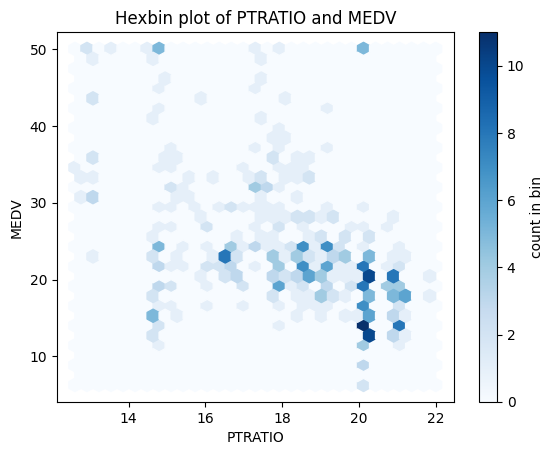

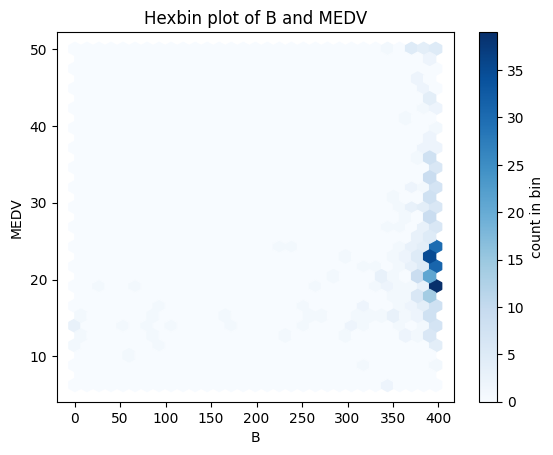

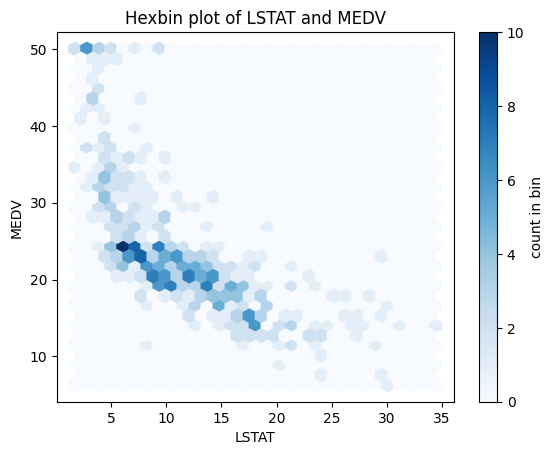

In [6]:
for column in df.columns:
    if column == 'MEDV':
        continue

    plt.hexbin(df[column], df['MEDV'], gridsize=30, cmap='Blues')
    cb = plt.colorbar(label='count in bin')

    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.title(f'Hexbin plot of {column} and MEDV')
    plt.show()

##### Task 6 : Another way to observe correlation between Variables in a dataset

##### Task 7 : Handle missing values
Drop the rows (or columns): This method is suitable when the proportion of missing data is relatively small, so it won’t cause significant information loss. It’s also useful when the values are missing completely at random, meaning the missingness has no relationship with any values, observed or missing.

Fill with the mean (or median, mode): This method is often used for numerical data. Mean imputation is suitable when the data is normally distributed, while median imputation is robust to outliers. However, this method can reduce the overall variability of the data and might give biased estimates of the variances and covariances.

K-Nearest Neighbors (KNN) Imputation: This method can be used for both numerical and categorical data. It’s especially useful when the data has a complex pattern that simple methods like mean/median imputation can’t capture. KNN imputation assumes that similar data points should have similar values, so it finds the k nearest neighbors to the observation with missing values and imputes them based on these neighbors.


In [7]:
df_drop_null = df.dropna(inplace=True)  # drop missing val
# replace missing val with mean of the column
df.fillna(df.mean(), inplace=True)

imputer = KNNImputer(n_neighbors=5)  # fill using k-nearest neighbors
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df = df_imputed  # choose this method

##### Task 8 : Remove unuseful columns from the dataset
Here are some of the cases when we can remove a column from our dataset.

Irrelevant Data: If the column does not contain any information relevant to the problem you are trying to solve, it can be removed.

Redundant Data: If two or more columns convey the same information, you can keep one and remove the others. e.g showing temperature in celsius and farenheit.

Too Many Missing Values: If a column has a significant number of missing values, it might not contribute much to your analysis and can be removed.

Noise: If the column contains noisy data, which is meaningless or distracting information, it can be removed.

High Correlation: If two variables are highly correlated, they carry similar information. In this case, you can consider removing one of them to reduce dimensionality.

Here we can remove the 'CHAS' column because it's irrelevant and doesn't convey any useful information.
We can also remove the 'RM' column because by looking at the heatmap we can see that it has a 99% correlation with another variable so we can remove it to reduce dimensionality.

We can also remove columns that have a low correlation with the target variable but neither of the columns have a correlation that low.

There exist some rows where the 'RAD' column has 666 as its value. Those are junk data and are not useful and will only lower our model's accuracy.

In [8]:
df = df.drop(['CHAS'], axis='columns')
df = df.loc[df["RAD"] != 666]

##### Task 9 : Explain numerical and categorical values
There are two main types of data: categorical and numerical. Numerical data, as the name implies, refers to numbers. Categorical data is everything else.

Categorical data is non-numerical information that is divided into groups.
As its name suggests, categorical data describes categories or groups. 

Based on the descriptions the Categorical values in our dataset are the columns 'CHAS', 'RAD'.

The Numerical variables are all the other columns besides the categorical columns.

##### Task 10 : Explain standardization and normalization of numerical data
Normalization is a scaling technique where the values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. Here’s the formula for normalization:

#### $$ \frac{x - x_{min}}{x_{max} - x_{min}} $$

Here X_norm is the normalized value, X is the original value to be scaled and X_min and X_max are the minimum and maximum values of that variable. Normalization is typically sensitive to outliers since having for example a very big number will cause all other numbers to become small and might lead to loss of information.

Standardization, on the other hand, is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Here’s the formula for standardization:

#### $$ \frac{x - \mu}{\sigma} $$


Here X_std is the standardized value, mu is the mean of the feature and sigma is the standard deviation of the feature.

In [9]:
scaler = StandardScaler()  # standardize the data
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

##### Task 11 : Which preprocessing methods are best for handl
Label Encoding: This method involves assigning each unique category value to a different integer. This approach is very straightforward but has the disadvantage that the numerical values can be misinterpreted by the algorithm as having some sort of hierarchy or order.

One-Hot Encoding: This method converts each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

Binary Encoding: This method first encodes the categories as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot.

Mean Encoding: In this method, we replace the category by the mean of the target variable for that category. This could lead to overfitting if not handled properly.

Hashing Encoding: This technique uses the hashing trick to encode the categorical variables. The user defines the number of features to be returned, which makes this technique useful for dealing with high cardinality categorical features.

##### Task 12 : Divide the data into train, test and validation sets.
##### Training Dataset:
 The sample of data used to fit the model.

The actual dataset that we use to train the model (weights and biases in the case of a Neural Network). The model sees and learns from this data.

##### Validation Dataset:
 The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

The validation set is used to evaluate a given model, but this is for frequent evaluation. We use this data to fine-tune the model hyperparameters. Hence the model occasionally sees this data, but never does it “Learn” from this.
##### Test Dataset:
 The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained(using the train and validation sets).

In [10]:
train_and_validation, test = train_test_split(df, test_size=0.1)
X_test = test.drop(['MEDV'], axis='columns')
y_test = test['MEDV']
# use train_test_split to split train into validation and train
train, validation = train_test_split(train_and_validation, test_size=0.15)
X_train = train.drop(['MEDV'], axis='columns')
y_train = train['MEDV']
X_validation = validation.drop(['MEDV'], axis='columns')
y_validation = validation['MEDV']

##### Task 14: 
Supervised Learning: This is a paradigm in machine learning where input objects (for example, a vector of predictor variables) and a desired output value (also known as human-labeled supervisory signal) train a model1. The training data is processed, building a function that maps new data on expected output values. An optimal scenario will allow for the algorithm to correctly determine output values for unseen instances.

Unsupervised Learning: This is a method in machine learning where, in contrast to supervised learning, algorithms learn patterns exclusively from unlabeled data. Within such an approach, a machine learning model tries to find any similarities, differences, patterns, and structure in data by itself.

Semi-Supervised Learning: This is a branch of machine learning that combines supervised and unsupervised learning by using both labeled and unlabeled data to train artificial intelligence (AI) models for classification and regression tasks. Semi-supervised learning methods are especially relevant in situations where obtaining a sufficient amount of labeled data is prohibitively difficult or expensive, but large amounts of unlabeled data are relatively easy to acquire.

Reinforcement Learning: This is a type of machine learning where an agent learns how to interact with an environment through trial and error and receiving feedback in the form of rewards or penalties. The agent learns behaviors that maximize its reward.

Examples for each of the learning methods :

Supervised Learning: A common example is email spam filtering. The input is the email content and the output is whether the email is spam or not. The model is trained with a dataset of emails which are already labeled as “spam” or “not spam”. Once trained, the model can classify new emails into these categories.

Unsupervised Learning: A typical example is customer segmentation in marketing. Here, a dataset of customer features is used but there are no labels. The model identifies patterns and clusters customers based on similarities in their features. These clusters can then be used to target marketing campaigns.

Semi-Supervised Learning: An example could be a photo archive system where only some photos are labeled. For instance, out of a large set of photos, only a few are tagged with people’s names. The model can learn features from the unlabeled data and improve its performance on the labeled data, eventually being able to predict labels (people’s names) for new, unseen photos.

Reinforcement Learning: A classic example is a chess game AI. The agent (AI) makes a move (action), the game state changes (environment), and the agent gets a reward or penalty (feedback) depending on whether the move was good or bad. Over time, the AI learns a policy of what move to make in each state that maximizes its reward

##### Task 15 : explain regression and explain its difference with clustering methods
Regression is a statistical method that is used mostly to predict the value of "continuous" and "numerical" variables in a data set. The most common form which is Linear Regression involves passing a line through our data that minimizes a loss function (for example MSE) and using the line to predict the values of previously unseen features.

On the other hand, clustering is a type of unsupervised learning method used to group similar data points together based on certain features or characteristics3. Unlike regression, which predicts a continuous output, clustering is about finding and grouping similar data points together, creating clusters. Clustering isn't concerned with predicting and exact value and is mostly used for category prediction.

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$

Based on the above formula, implement the function below to compute the parameters of a simple linear regression

##### Task 16 & 17 : Complete the functions given below and explain each function


In [11]:
def linear_regression(x, y):
    n = np.size(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    SS_xy = np.sum(y * x) - n * y_mean * x_mean
    SS_xx = np.sum(x * x) - n * x_mean * x_mean

    alpha = SS_xy / SS_xx
    beta = y_mean - alpha * x_mean

    return alpha, beta

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [12]:
def get_regression_predictions(feature, beta, alpha):
    predictions = alpha * feature + beta  # aX + b
    return predictions

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

##### Task 18 : Explain RSS, MSE, RMSE and R2 scores
#### RSS :

The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, of a regression model.
The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data.
The distance between the actual value of the dependent variable and our prediction (in this case the regression line) is called a residual. RSS consists of raising the residuals to the power of 2 and then summing them over all of the ys we want to predict.

#### $RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

#### MSE : 

The mean squared error (MSE) is the mean of all the residuals raised to the power of 2. In other words 
#### $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

or

#### $MSE = \frac{1}{n}RSS$

#### RMSE :

RMSE (root-mean-squared-error) is simply the root of MSE. It is specially useful since it has is measuer with the same unit as the response variable

#### $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

#### R² : 
The R² score shows the proportion of the variance of the data that our model is able to explain. an R² score of 1 (100%) means that our model is able to explain all the variance in our data. On the other hand an R² score of 0 means that our model cannot explain any of the variance in our data. respectively an R² score of 0.5 means that our model can explain 50% of the variance in our data. The numerator of the fraction represents the error of our model. (The formula being 1 - RSS/TSS). And the denominator represents the total variance in our data. 

he fraction SSres/SStot represents the proportion of the total variance that our model is not able to explain. So, 1 - SSres/SStot gives us the proportion of the total variance that our model is able to explain, which is exactly what R² represents.


#### $R^2 = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$





In [13]:
def get_root_mean_square_error(predicted_values, actual_values):
    n = len(actual_values)
    SE = 0  # squared error
    for i in range(n):
        SE += (actual_values.iloc[i] - predicted_values.iloc[i])**2
    RMSE = math.sqrt((SE / n))
    return RMSE

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [14]:
def get_r2_score(predicted_values, actual_values):
    n = len(actual_values)
    RSS, TSS = 0, 0
    mu = np.mean(actual_values)
    for i in range(n):
        RSS += (actual_values.iloc[i] - predicted_values.iloc[i]) ** 2
        TSS += (actual_values.iloc[i] - mu) ** 2
    return 1 - (RSS / TSS)

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

We should choose the variable that has the most correlation with the column 'MEDV' as our predictor.

In [15]:
alpha, beta = linear_regression(x=X_train['RM'], y=y_train)
predictions_validation = get_regression_predictions(
    feature=X_validation['RM'], alpha=alpha, beta=beta)
predictions_test = get_regression_predictions(
    feature=X_test['RM'], alpha=alpha, beta=beta)

RMSE_validation = get_root_mean_square_error(
    predicted_values=predictions_validation, actual_values=y_validation)
R2_validation = get_r2_score(
    predicted_values=predictions_validation, actual_values=y_validation)
RMSE_test = get_root_mean_square_error(
    predicted_values=predictions_test, actual_values=y_test)
R2_test = get_r2_score(predicted_values=predictions_test, actual_values=y_test)

print("The RMSE score on the validation set is : ", RMSE_validation)
print("The R2 score on the test validation is : ", R2_validation)
print("The RMSE score on the test set is : ", RMSE_test)
print("The R2 score on the test set is : ", R2_test)

The RMSE score on the validation set is :  0.59733077136068
The R2 score on the test validation is :  0.49902301289639694
The RMSE score on the test set is :  0.8165121143806451
The R2 score on the test set is :  0.4354072262402515


##### Task 20 : Plot the results on a scatter plot

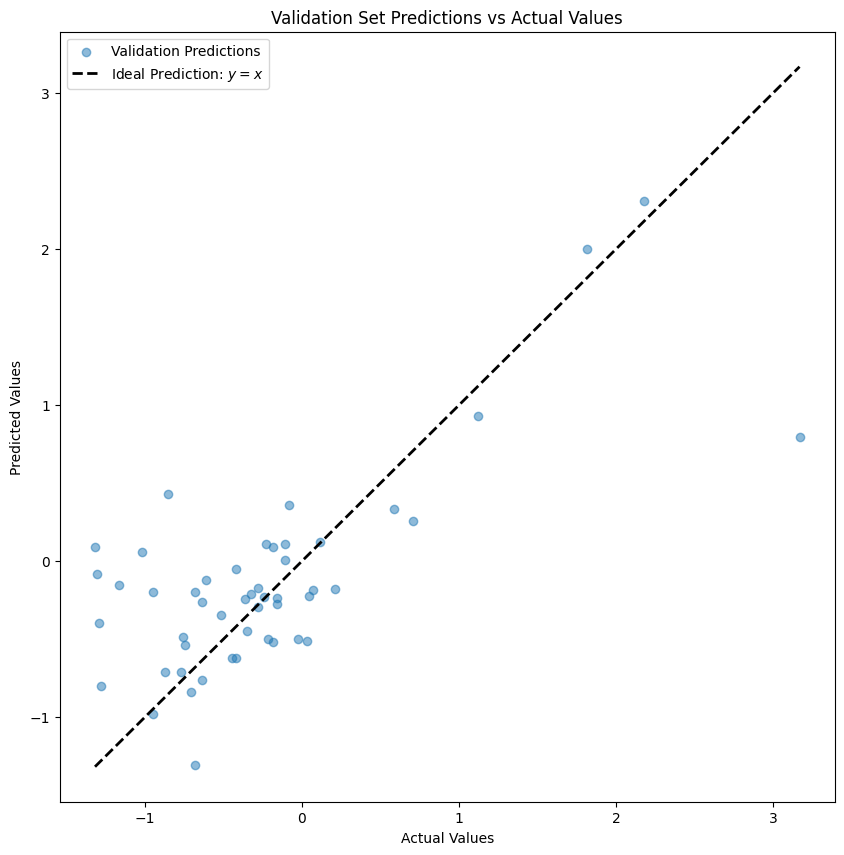

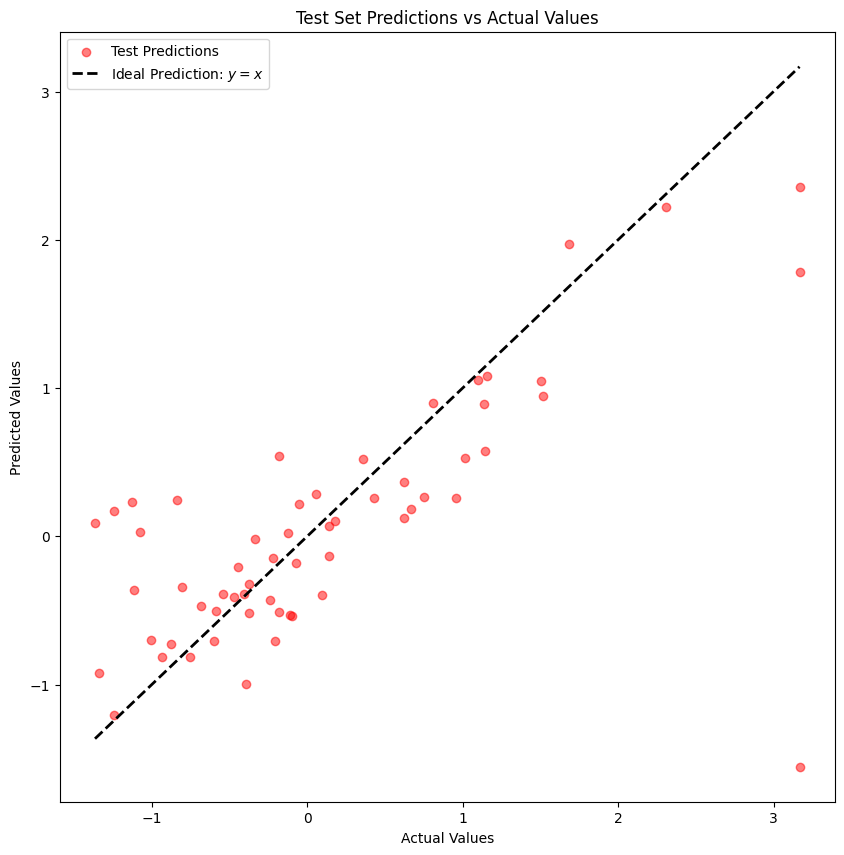

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(y_validation, predictions_validation, alpha=0.5, label='Validation Predictions')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'k--', lw=2, label='Ideal Prediction: $y = x$')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set Predictions vs Actual Values')
plt.legend()
plt.show()

# Scatter plot for test set
plt.figure(figsize=(10, 10))
plt.scatter(y_test, predictions_test, alpha=0.5, color='red', label='Test Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction: $y = x$')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set Predictions vs Actual Values')
plt.legend()
plt.show()

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [17]:
def polynomial_regression(x, y, degree):
    pass
    # TO DO

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [18]:
def feature_derivative(errors, feature):
    # TO DO
    pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [19]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (
            data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def predict_output(feature_matrix, weights, bias):
    # TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions

## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [20]:
# def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
#     weights = np.array(initial_weights)

#     while True:
#         # Compute predictions using polynomial function and errors
#         #TO DO

#         # Compute derivatives for all weights
#         #TO DO

#         # Update weights and bias
#         #TO DO

#         # Check convergence
#         #TO DO

#     return weights, bias
# pass

In [21]:

# def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
#     initial_weights = keywords['initial_weights']
#     step_size = keywords['step_size']
#     tolerance = keywords['tolerance']
#     bias = keywords['bias']
#     weights = np.array(initial_weights)
#     weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

#     return weights, bias

# def get_weights_and_bias(chosen_features):

#     keywords = {
#         'initial_weights': np.array([.5]*len(chosen_features)),
#         'step_size': 1.e-4,
#         'tolerance': 1.e-10,
#         'bias': 0
#     }

#     # TO DO

#     return chosen_feature_matrix, train_weights, bias
# pass

##### Task 21 : Explain pruning in decision trees
Pruning in decision trees is a technique used to optimize decision tree models by reducing their complexity and improving their ability to generalize to new data1. The goal of pruning is to prevent decision trees from overfitting the training data1. This is achieved by removing parts of the tree that do not provide significant predictive power.

Advantages:

Reduces Overfitting: Pruning helps to reduce overfitting, which is when a model performs well on the training data but poorly on unseen data.

Improves Generalization: By simplifying the decision tree, pruning can improve the model’s ability to generalize to new data.

Enhances Interpretability: Pruned decision trees are often simpler and easier to understand, which can make them more interpretable.

Improves Predictive Accuracy: Pruning can improve the predictive accuracy of the model by removing parts of the tree that do not provide significant predictive power.

Speeds Up Prediction: Pruned trees are smaller in size, which can make predictions faster.

Disadvantages:

Requires Careful Tuning: Techniques like pruning and setting constraints on tree depth or minimum samples per leaf can mitigate overfitting, but careful tuning is required to strike the right balance between complexity and simplicity.

Risk of Underfitting: If too much pruning is done, the model may become oversimplified and may not capture important patterns in the data, leading to underfitting.

Dependent on Dataset Size: Post-Pruning is generally used for small datasets whereas Pre-Pruning is used for larger ones.


##### Task 22 : When do we prefer Decision trees over other models?

Interpretability: Decision trees are often a good choice when interpretability is a key requirement. They are easy to understand and visualize, which makes them useful in situations where you need to explain the model’s decisions to stakeholders.

Handling Categorical Variables: If your dataset has categorical variables, decision trees can handle them naturally, whereas other models like linear regression would require one-hot encoding.

Non-Linear Relationships: Decision trees can capture non-linear relationships between features, which can be an advantage over linear models when the data is not linear.

Robust to Outliers: Decision trees are less sensitive to outliers in the data. If your dataset contains outliers, decision trees might perform better than other models like linear regression.

Minimal Data Preprocessing: Decision trees require less data preprocessing. They do not require feature scaling or centering, which are necessary steps for many other machine learning algorithms.

Simpler Datasets: Decision trees are best used when working with simpler datasets due to easier interpretability and simpler model training.

##### Task 23 : How is KNN different from logistic regression and neural networks?
K-Nearest Neighbors (KNN): KNN is a type of instance-based learning algorithm. It doesn’t really have a training phase. Instead, it memorizes the training dataset. When a prediction is needed, KNN identifies the k instances in the training dataset that are closest to the new input, and assigns the most common output value (in classification) or the average output value (in regression) among these k instances.

Neural Networks: Neural networks are trained using a process called backpropagation and an optimization technique, such as gradient descent. During training, the weights of the network are iteratively adjusted to minimize the difference between the predicted output and the actual target values. This is a computationally intensive process, but once trained, a neural network can make predictions quickly.

Logistic Regression: Logistic regression is a type of linear model that uses a logistic function to model a binary dependent variable. During training, the weights (or coefficients) of the logistic regression model are estimated to maximize the likelihood of the observed data. Once trained, the model can quickly generate predictions for new inputs

##### Task 24 : What is One nearest neighbor classification?

Pros:

Simplicity: The algorithm is very easy to understand and implement
.
No assumptions: It’s a non-parametric method, which means it makes no assumptions about the underlying data distribution.

Adaptability: The classifier immediately adapts as we collect new training data.

Robust to noisy data: It can handle noisy data effectively.

Cons:

Computationally expensive: As the dataset grows, the efficiency or speed of the algorithm declines very fast. For every prediction we need to compute its distance with all other points. and for every new entry we need to store it and all its features.

Need for homogeneous features: If you decide to build k-NN using a common distance, like Euclidean or Manhattan distances, it is completely necessary that features have the same scale.

Sensitive to irrelevant features: Since all features contribute to the calculation of distance, the presence of irrelevant features can affect the performance.

##### 25 : What are some metods for distance measurement in KNN algorithm?
Euclidean Distance: This is the most widely used method and is the default metric in many libraries, including Python’s scikit-learn. It is a measure of the true straight line distance between two points in Euclidean space.

Manhattan Distance: Also known as taxicab or city block distance. The distance between two points is the sum of the absolute differences of their Cartesian coordinates. This distance is preferred over Euclidean when dealing with high dimensionality.

Hamming Distance: This is used for categorical variables. If the value (i.e., the category) of the variable differs between two observations, the distance is set to 1, otherwise it is 0. Then all distances are summed

##### Task 26 :


Find the tithes of the dataset according to 'MEDV' and label them according to the problem description.

In [22]:
df = df.sort_values('MEDV', ascending=False)
num_rows = len(df)
top_bottom_tithe = (num_rows // 10) * 2
df['CLASS'] = 'regular'
df.iloc[:top_bottom_tithe, df.columns.get_loc('CLASS')] = 'luxury'
df.iloc[-top_bottom_tithe:, df.columns.get_loc('CLASS')] = 'economic'

Split the dataset into train, test and validation sets.

In [23]:
train_and_validation, test = train_test_split(df, test_size=0.10)
X_test = test.drop(['CLASS', 'MEDV'], axis='columns')
y_test = test['CLASS']
train, validation = train_test_split(train_and_validation, test_size=0.15)
X_train = train.drop(['CLASS', 'MEDV'], axis='columns')
y_train = train['CLASS']
X_validation = validation.drop(['CLASS', 'MEDV'], axis='columns')
y_validation = validation['CLASS']

Train a TreeDecisionClassifier model and a KNNClassifier model and choose hyperparameters for each model by experimenting with validation sets. Then display the accuracy, precision, recall and F1 scores for each model along their confusion matrix.

Using validation sets: 
Decision Tree Classifier:
Accuracy: 0.7358490566037735
Confusion Matrix:



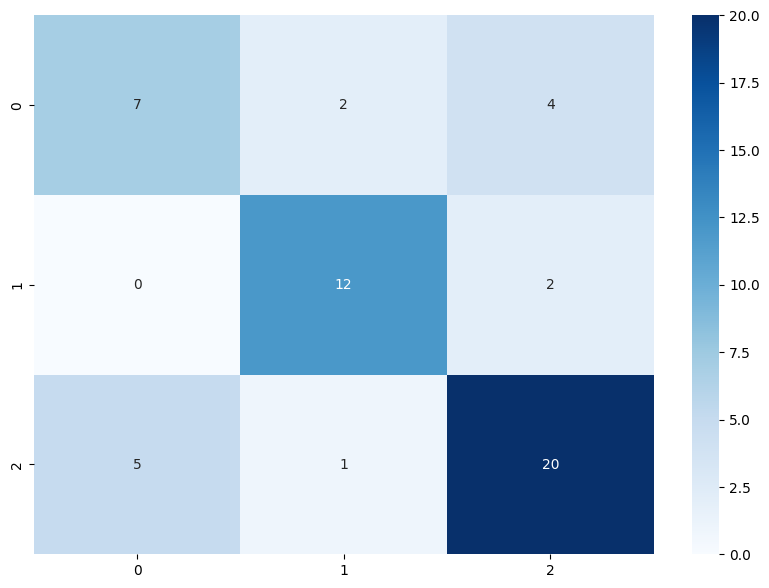

Decision Tree Classification Report:
               precision    recall  f1-score   support

    economic       0.58      0.54      0.56        13
      luxury       0.80      0.86      0.83        14
     regular       0.77      0.77      0.77        26

    accuracy                           0.74        53
   macro avg       0.72      0.72      0.72        53
weighted avg       0.73      0.74      0.73        53

Using validation sets: 

K-Nearest Neighbors Classifier:
Accuracy: 0.8490566037735849
Confusion Matrix:



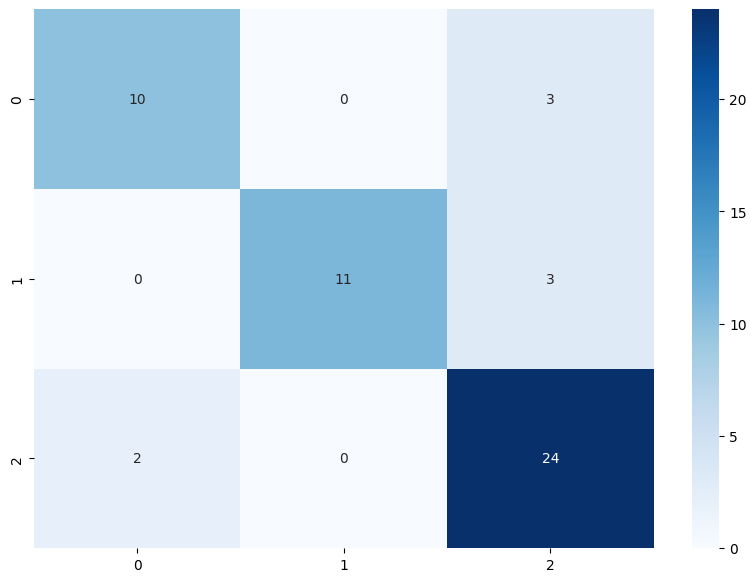

KNN Classification Report:
               precision    recall  f1-score   support

    economic       0.83      0.77      0.80        13
      luxury       1.00      0.79      0.88        14
     regular       0.80      0.92      0.86        26

    accuracy                           0.85        53
   macro avg       0.88      0.83      0.85        53
weighted avg       0.86      0.85      0.85        53



In [24]:

# For Decision Tree Classifier
tree_clf = DecisionTreeClassifier(
    criterion='entropy', max_depth=13, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_validation)

# Evaluating Decision Tree Classifier
accuracy_tree = accuracy_score(y_validation, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_validation, y_pred_tree)
class_report_tree = classification_report(y_validation, y_pred_tree)
print("Using validation sets: ")
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_tree)
print("Confusion Matrix:\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tree, annot=True, fmt='g', cmap='Blues')
plt.show()

print("Decision Tree Classification Report:\n", class_report_tree)

# For K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(
    n_neighbors=5, weights='distance', algorithm='auto', leaf_size=40, p=2, metric='manhattan')
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_validation)

# Evaluating K-Nearest Neighbors Classifier
accuracy_knn = accuracy_score(y_validation, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_validation, y_pred_knn)

class_report_knn = classification_report(y_validation, y_pred_knn)
print("Using validation sets: ")
print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='g', cmap='Blues')
plt.show()
print("KNN Classification Report:\n", class_report_knn)

Test the model for the test data :

Using test sets: 
Decision Tree Classifier:
Accuracy: 0.875
Confusion Matrix:



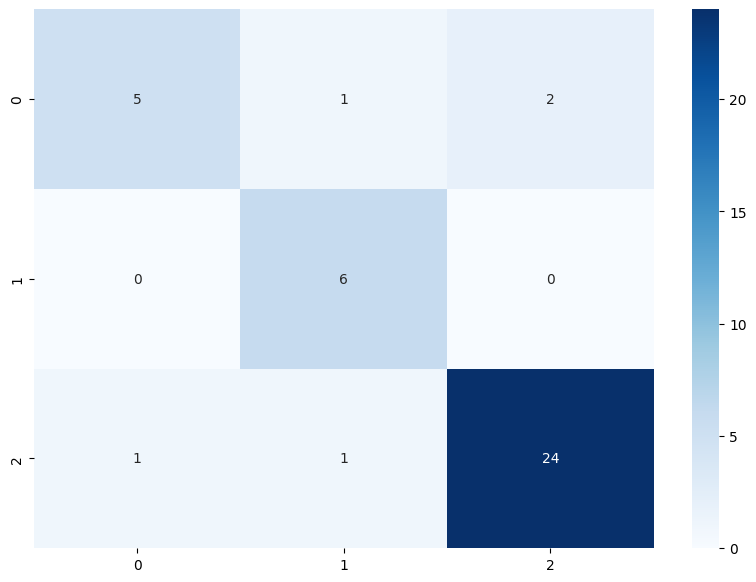

Decision Tree Classification Report:
               precision    recall  f1-score   support

    economic       0.83      0.62      0.71         8
      luxury       0.75      1.00      0.86         6
     regular       0.92      0.92      0.92        26

    accuracy                           0.88        40
   macro avg       0.84      0.85      0.83        40
weighted avg       0.88      0.88      0.87        40

Using test sets: 

K-Nearest Neighbors Classifier:
Accuracy: 0.8
Confusion Matrix:



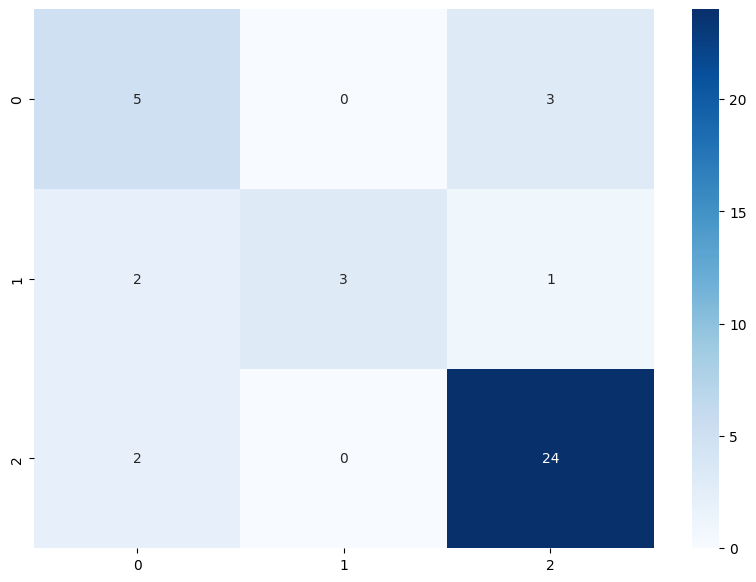

KNN Classification Report:
               precision    recall  f1-score   support

    economic       0.56      0.62      0.59         8
      luxury       1.00      0.50      0.67         6
     regular       0.86      0.92      0.89        26

    accuracy                           0.80        40
   macro avg       0.80      0.68      0.71        40
weighted avg       0.82      0.80      0.80        40



In [25]:
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)
print("Using test sets: ")
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_tree)
print("Confusion Matrix:\n")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tree, annot=True, fmt='g', cmap='Blues')
plt.show()
print("Decision Tree Classification Report:\n", class_report_tree)


y_pred_knn = knn_clf.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
print("Using test sets: ")
print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='g', cmap='Blues')
plt.show()
print("KNN Classification Report:\n", class_report_knn)

##### Task 27 : Explain how GridsearchCV works
Parameter Grid Setup: You define a dictionary of hyperparameters and the range of values you want to test for each.

Cross-Validation Setup: GridSearchCV performs cross-validation to evaluate each possible combination of hyperparameter values. This involves splitting the training data into a set number of folds.

Model Training and Evaluation: For each combination of parameters in your grid, GridSearchCV will train your model on the training fold and validate it on the test fold. It repeats this process for each fold, ensuring that every data point gets to be in a test fold once.

Scoring: After training, each parameter combination is scored based on a metric you specify, such as accuracy, precision, recall, or F1 score.

Best Parameters Selection: Once all combinations have been evaluated, GridSearchCV selects the combination that yielded the best score during cross-validation.

Using test sets: 
Decision Tree Classifier:
Accuracy: 0.875
Confusion Matrix:



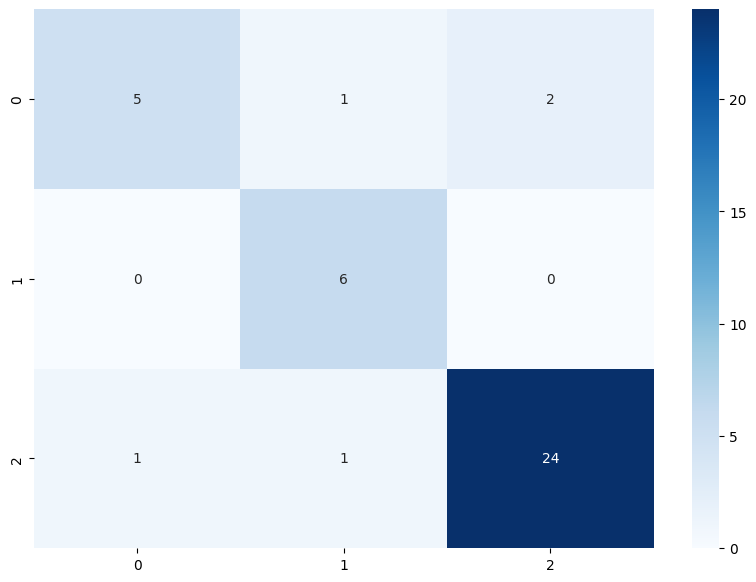

Decision Tree Classification Report:
               precision    recall  f1-score   support

    economic       0.83      0.62      0.71         8
      luxury       0.75      1.00      0.86         6
     regular       0.92      0.92      0.92        26

    accuracy                           0.88        40
   macro avg       0.84      0.85      0.83        40
weighted avg       0.88      0.88      0.87        40



In [26]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 14, 2)),
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
grid_search_tree = GridSearchCV(
    DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='f1_weighted')
grid_search_tree.fit(X_train, y_train)
best_params_tree = grid_search_tree.best_params_
optimal_tree = DecisionTreeClassifier(**grid_search_tree.best_params_)
optimal_tree.fit(X_train, y_train)
y_pred_optimal_tree = tree_clf.predict(X_test)

# Evaluating Decision Tree Classifier
accuracy_optimal_tree = accuracy_score(y_test, y_pred_optimal_tree)
conf_matrix_optimal_tree = confusion_matrix(y_test, y_pred_optimal_tree)
class_report_optimal_tree = classification_report(y_test, y_pred_optimal_tree)
print("Using test sets: ")
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_optimal_tree)
print("Confusion Matrix:\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_optimal_tree, annot=True, fmt='g', cmap='Blues')
plt.show()

print("Decision Tree Classification Report:\n", class_report_optimal_tree)

Using test sets: 
KNN Classifier:
Accuracy: 0.85
Confusion Matrix:



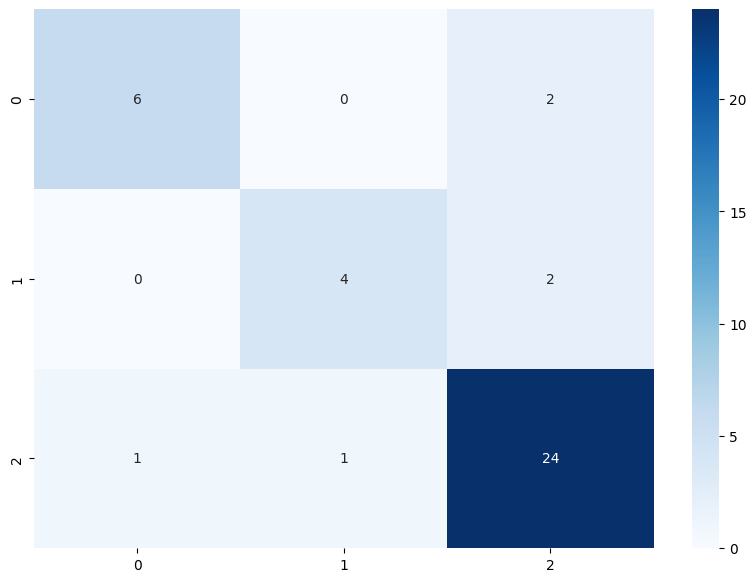

KNN Classification Report:
               precision    recall  f1-score   support

    economic       0.86      0.75      0.80         8
      luxury       0.80      0.67      0.73         6
     regular       0.86      0.92      0.89        26

    accuracy                           0.85        40
   macro avg       0.84      0.78      0.81        40
weighted avg       0.85      0.85      0.85        40



In [27]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best parameters for KNN
best_params_knn = grid_search_knn.best_params_
optimal_knn = DecisionTreeClassifier(**grid_search_tree.best_params_)
optimal_knn.fit(X_train, y_train)
y_pred_optimal_knn = optimal_knn.predict(X_test)

# Evaluating Decision Tree Classifier
accuracy_optimal_knn = accuracy_score(y_test, y_pred_optimal_knn)
conf_matrix_optimal_knn = confusion_matrix(y_test, y_pred_optimal_knn)
class_report_optimal_knn = classification_report(y_test, y_pred_optimal_knn)
print("Using test sets: ")
print("KNN Classifier:")
print("Accuracy:", accuracy_optimal_knn)
print("Confusion Matrix:\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_optimal_knn, annot=True, fmt='g', cmap='Blues')
plt.show()

print("KNN Classification Report:\n", class_report_optimal_knn)

##### Task 28 : Plot the obtained tree

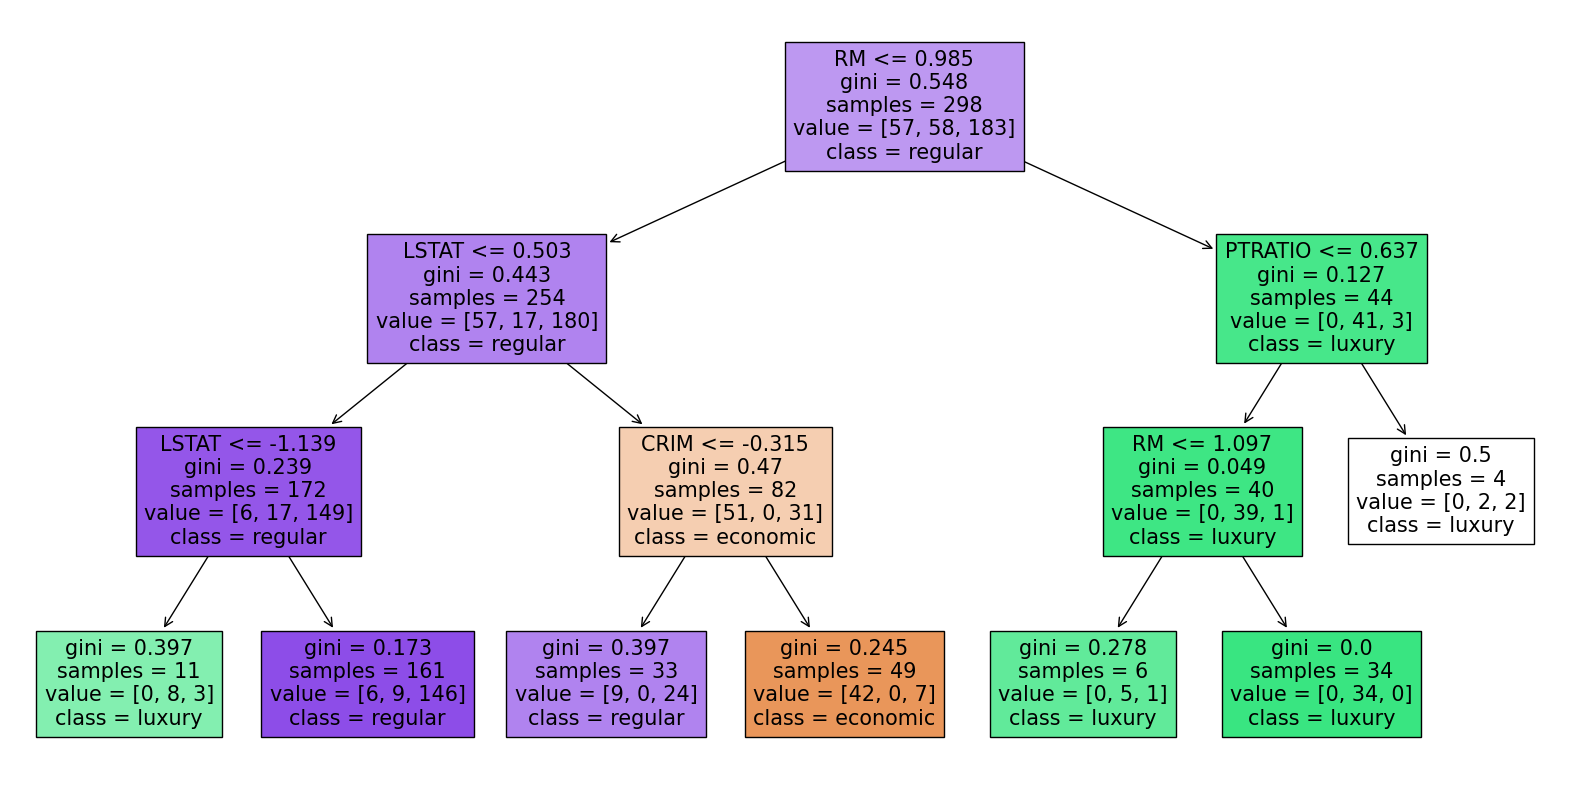

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, feature_names=X_train.columns, class_names=[
          'economic', 'luxury', 'regular'], filled=True)
plt.show()

For KNN:

Underfitting: If the model performs poorly on both the training and test sets, it might be too simplistic. This can happen if the value of k is too large, leading to overly generalized predictions.

Overfitting: If the model performs exceptionally well on the training set but poorly on the test set, it might be too complex. This can occur if the value of k is too small, causing the model to be overly sensitive to noise in the training data.

For Decision Trees:

Underfitting: A decision tree that is too shallow (i.e., not enough depth) may not capture the complexities of the data, resulting in poor performance on both training and test sets.

Overfitting: A decision tree that is too deep may learn the noise in the training data, leading to high accuracy on the training set but poor accuracy on the test set.

##### Task 30 : Diversity of Opinion: Each model in the ensemble may look at the data differently, and by combining them, we get a more holistic view.
Error Reduction: Individual models may make different errors, and ensembling can cancel out these errors to some extent.

Improved Accuracy: Often, an ensemble of models performs better than any single model because it smooths out their individual predictions.

Robustness: Ensembles are less likely to be overly fitted to the training data, making them more reliable on unseen data.

##### Task 31 : Explain Boosting and Bagging and their differences :

Bagging:

Involves creating multiple models (usually of the same type) on different subsets of the training dataset.
These subsets are created through a process called bootstrapping, which is random sampling with replacement.
The models are trained independently and in parallel.
The final prediction is typically an average (for regression) or a majority vote (for classification) of all the models’ predictions.
Bagging is effective at reducing variance and helps to avoid overfitting.

Boosting:

Boosting is about building a series of models in a sequential manner.
Each subsequent model attempts to correct the errors made by the previous models.
The models are weighted based on their accuracy, and the final prediction is a weighted sum of all the models’ predictions.
Boosting can reduce both bias and variance and is particularly useful when dealing with weak learners.

Differences:

Training Method: Bagging trains models in parallel, while Boosting trains models sequentially.

Model Weighting: In Bagging, each model has equal weight, whereas in Boosting, models are weighted based on their performance.

Error Correction: Boosting focuses on correcting the errors of previous models, while Bagging reduces variance through averaging.

Sensitivity to Outliers: Boosting can be sensitive to outliers since each model is influenced by the performance of the previous one, while Bagging is more robust to outliers due to the averaging process

##### Task 32 : Briefly explain how random forests work :
Data Sampling: For each tree, a random sample of the training data is selected using bootstrapping (sampling with replacement).

Feature Selection: At each node of the tree, a random subset of features is chosen to determine the best split.

Tree Building: Each tree is grown to the largest extent possible without pruning, which means they can fully model the noise in their bootstrap sample.

Prediction Aggregation: For regression tasks, the final prediction is the average of all the trees’ predictions. For classification, it’s the majority vote.

##### Task 33 : Explain Bootstrapping in the context of RandomForests :

How Bootstrapping Works in Random Forests:

Random Sampling: In bootstrapping, for each tree in the forest, a random sample of the data is selected with replacement from the original dataset. This means some observations may be repeated in the sample, while others are left out.

Creating Trees: Each tree in the Random Forest is built on these bootstrapped samples. Since the samples are different for each tree, the trees end up being diverse.

Replacement: The ‘with replacement’ aspect means that an observation can be selected multiple times in the same tree’s training dataset.

Effects on the Model’s Results:

Reduction in Variance: By training each tree on a slightly different set of data, bootstrapping reduces the variance of the model without increasing the bias. This means the model is less likely to overfit to the training data.

Error Reduction: Different trees will make different errors on different subsets of the data. When averaged, these errors can cancel out, leading to a more accurate overall prediction.

Out-of-Bag Error Estimation: Observations left out of a tree’s bootstrapped sample (out-of-bag samples) can be used to validate the tree. This provides an unbiased estimate of the model’s performance during training.

In essence, bootstrapping allows Random Forests to build a collection of decision trees with controlled variance, making the ensemble model more reliable and accurate than individual trees or a non-bootstrapped model

##### Task 34 : Explain how the number of trees affects the prediction. what is the optimal number of trees?
Generally the more the trees the more our predictive performance improves since our forest gets more and more diverse, however at a certain point it doesn't contribute much and the performance cost overpowers its predictive value. The optimal number of trees defers for each problem and depends on several factors however a good range to start with could be 100-1000.

##### Task 35 : When should we use RandomForests and when shouldn't we?

When to Use Random Forests:

Classification and Regression Tasks: Random Forests can be used for both types of tasks with high accuracy.

Handling Missing Values: They can handle missing values without a significant drop in accuracy.

Large Datasets: They work well with large datasets and can handle high dimensionality.

Less Data Preprocessing: Random Forests require less data preparation compared to methods like Neural Networks or SVMs. For instance, you don’t need to do feature scaling.

Default Parameters: Often, you can use default parameters and just set the number of trees; more trees usually lead to better performance.

When Not to Use Random Forests:

Sparsity: If the data is very sparse, Random Forests might struggle because the bootstrapped sample and the random subset of features could produce an invariant feature space. (sparse = missing data)

Data Not Axis-Aligned: Random Forests may not perform well if the decision boundary is not aligned with the feature axes. For example, if there is a diagonal decision boundary, Random Forests would require many splits to describe it. For example, if you have two features, ( x_1 ) and ( x_2 ), an axis-aligned model would make splits in the data such as ( x_1 > a ) or ( x_2 < b ), where ( a ) and ( b ) are constants. However, if the true decision boundary in the data is diagonal or not parallel to the feature axes, like ( x_1 + x_2 = c ), then the model will struggle.

Complex Relationships: If the data contains complex relationships that a simple axis-aligned decision tree cannot capture, other methods like Rotation Forest or models that can capture more complex relationships might be more suitable

##### Task 36 : Describe the effect random forests have on variace?

Random Forests create a “forest” of decision trees, each trained on a random subset of the data and features. By averaging the predictions of these trees, Random Forests reduce the variance that any single tree might have due to its particular sample of the data1. This is because while individual trees can be sensitive to the noise in their training data (high variance), the ensemble process averages out this noise, leading to more stable and robust predictions

##### Task 37 : Explain the parameters of RandomForests and then train and optimize a RF model and optimize it using GridsearchCV.

n_estimators: The number of trees in the forest. More trees can lead to better performance but also increases computational cost.

criterion: The function to measure the quality of a split. “gini” for the Gini impurity, and “entropy” for the information gain.

max_depth: The maximum depth of each tree. Deeper trees can capture more complex patterns but might lead to overfitting.

min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent creating nodes that represent too specific cases.

min_samples_leaf: The minimum number of samples required to be at a leaf node. This can smooth the model, especially in regression.

max_features: The number of features to consider when looking for the best split. Can be an integer, float, “auto”, “sqrt”, “log2”, or None.

bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

n_jobs: The number of jobs to run in parallel for both fit and predict. If set to -1, then the number of jobs is set to the number of cores.

warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_s

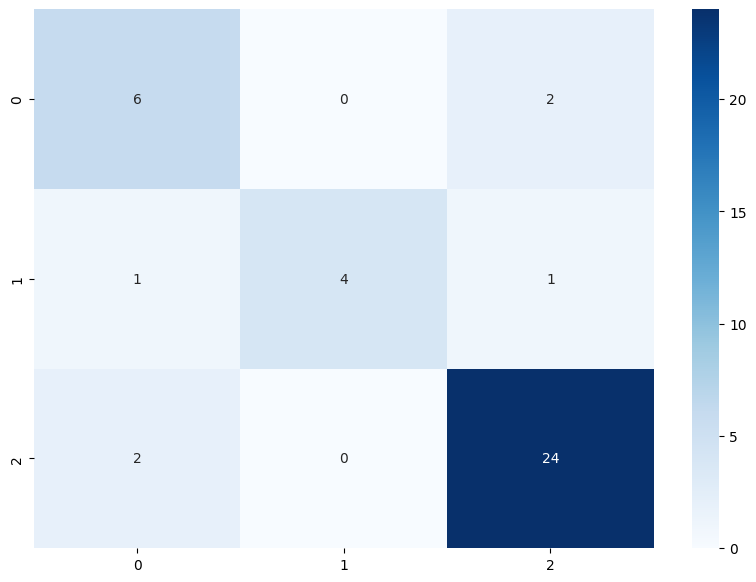

RF Classification Report:
               precision    recall  f1-score   support

    economic       0.67      0.75      0.71         8
      luxury       1.00      0.67      0.80         6
     regular       0.89      0.92      0.91        26

    accuracy                           0.85        40
   macro avg       0.85      0.78      0.80        40
weighted avg       0.86      0.85      0.85        40



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)
y_test_pred = rf_best.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_test_pred)
conf_matrix_best_rf = confusion_matrix(y_test, y_test_pred)
class_report_best_rf = classification_report(y_test, y_test_pred)
print("Using test sets on RandomForest: ")
print("Accuracy:", accuracy_best_rf)
print("Confusion Matrix:\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='g', cmap='Blues')
plt.show()

print("RF Classification Report:\n", class_report_best_rf)

##### Task 40.1 : Classify Data using Linear and RBF kernels in SVMs :


Classification using RBF Kernel
Accuracy: 0.85
Confusion Matrix:



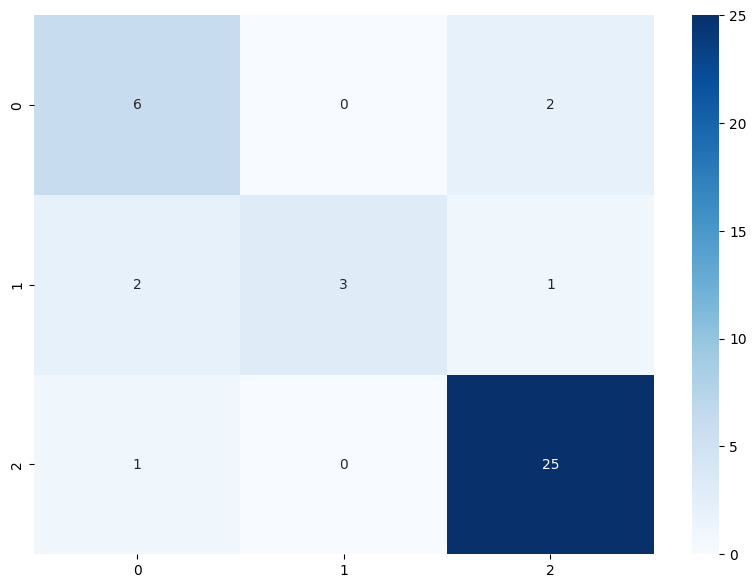

RBF kernel Classification Report:
               precision    recall  f1-score   support

    economic       0.67      0.75      0.71         8
      luxury       1.00      0.50      0.67         6
     regular       0.89      0.96      0.93        26

    accuracy                           0.85        40
   macro avg       0.85      0.74      0.77        40
weighted avg       0.86      0.85      0.84        40

Classification using Linear Kernel
Accuracy: 0.825
Confusion Matrix:



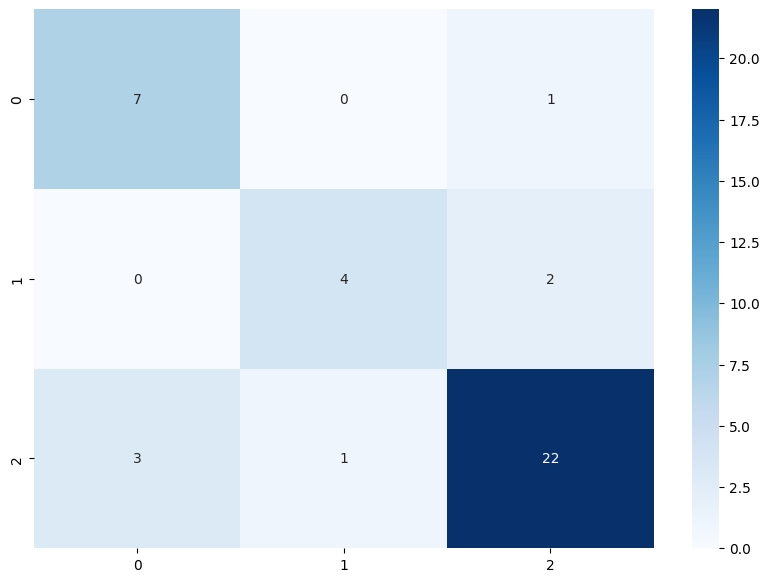

Linear kernel Classification Report:
               precision    recall  f1-score   support

    economic       0.70      0.88      0.78         8
      luxury       0.80      0.67      0.73         6
     regular       0.88      0.85      0.86        26

    accuracy                           0.82        40
   macro avg       0.79      0.80      0.79        40
weighted avg       0.83      0.82      0.83        40



In [30]:
classifier = SVC(kernel='rbf', gamma='scale')
classifier.fit(X_train, y_train)
y_pred_rbf = classifier.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
class_report_rbf = classification_report(y_test, y_pred_rbf)
print("Classification using RBF Kernel")
print("Accuracy:", accuracy_rbf)
print("Confusion Matrix:\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='g', cmap='Blues')
plt.show()

print("RBF kernel Classification Report:\n", class_report_rbf)

linear_classifier = SVC(kernel='linear')
linear_classifier.fit(X_train, y_train)
y_pred_linear = linear_classifier.predict(X_test)


accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
class_report_linear = classification_report(y_test, y_pred_linear)
print("Classification using Linear Kernel")
print("Accuracy:", accuracy_linear)
print("Confusion Matrix:\n")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_linear, annot=True, fmt='g', cmap='Blues')
plt.show()

print("Linear kernel Classification Report:\n", class_report_linear)

##### Task 40.3 :
If you have the computational resources and the time, Grid Search might be the better option for smaller hyperparameter spaces. For larger spaces, or when you want to save time, Random Search is a good alternative that can yield competitive results with less computational effort.

Grid Search is a methodical approach that sets up a grid of all possible combinations of the hyperparameters you want to tune and evaluates the model for each combination.

Random Search: Random Search, on the other hand, randomly selects combinations of hyperparameters to evaluate. Instead of trying out every single combination like Grid Search, Random Search samples from the defined hyperparameter space according to a specified distribution or simply at random.

##### Task 40.4
-GridSearch for RBF Kernel :

In [35]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale']
}
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, refit=True)
grid_search_rbf.fit(X_train, y_train)
print("Best estimator for RBF kernel:", grid_search_rbf.best_estimator_)


Best estimator for RBF kernel: SVC(C=10)
scale


GridSearch for Linear Kernel :

In [36]:
param_grid_linear = {
    'C': [0.1, 1, 10, 100, 1000]
}
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, refit=True)
grid_search_linear.fit(X_train, y_train)
print("Best estimator for Linear kernel:", grid_search_linear.best_estimator_)


Best estimator for Linear kernel: SVC(C=0.1, kernel='linear')


RandomSearch for RBF Kernel :

In [37]:
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV

param_distributions_rbf = {
    'C': expon(scale=100),
    'gamma': expon(scale=.1)
}
random_search_rbf = RandomizedSearchCV(SVC(kernel='rbf'), param_distributions_rbf, n_iter=100, random_state=1)
random_search_rbf.fit(X_train, y_train)
print("Best estimator for RBF kernel:", random_search_rbf.best_estimator_)


Best estimator for RBF kernel: SVC(C=18.91534511430008, gamma=0.014749789995743971)


RandomSearch for Linear Kernel:



In [38]:
param_distributions_linear = {
    'C': expon(scale=100)
}
random_search_linear = RandomizedSearchCV(SVC(kernel='linear'), param_distributions_linear, n_iter=100, random_state=1)
random_search_linear.fit(X_train, y_train)
print("Best estimator for Linear kernel:", random_search_linear.best_estimator_)


Best estimator for Linear kernel: SVC(C=0.287445431946199, kernel='linear')
